In [ ]:
!pip install pytorch-lightning
!pip install torch_lr_finder
!pip install grad-cam

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Assignment/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Assignment


In [2]:
# imports
import os

import torch
from pytorch_lightning import LightningModule, Trainer
from torch import nn
from torchvision import transforms
from torchsummary import summary
from utils import *

In [3]:
from Model.Lit_cifar_module import LitCifar
Litcifar_instance = LitCifar()

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


In [4]:
device = getdevice()
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
model = LitCifar()
trainer = Trainer(
    precision = 16,
    max_epochs = 24,
)
trainer.fit(model)

/usr/local/lib/python3.10/dist-packages/lightning_fabric/connector.py:554: UserWarning: 16 is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     | Type               | Params
------------------------------------------------
0 | model    | Net                | 6.6 M 
1 | accuracy | MulticlassAccuracy | 0     
------------------------------------------------
6.6 M     Trainable params
0         Non-trainable params
6.6 M     Total params
26.293    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=24` reached.


In [6]:
trainer.test()

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:148: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(


Files already downloaded and verified
Files already downloaded and verified


INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/gdrive/My Drive/Assignment/lightning_logs/version_16/checkpoints/epoch=23-step=33768.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/gdrive/My Drive/Assignment/lightning_logs/version_16/checkpoints/epoch=23-step=33768.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.8845000267028809     │
│         val_loss          │    1.5768483877182007     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 1.5768483877182007, 'val_acc': 0.8845000267028809}]

In [7]:
torch.save(model, 'final_model.pt')

In [5]:
from Dataset import Dataset
from Model.Lit_cifar_module import LitCifar
device = getdevice()
net = torch.load('final_model.pt').to(device)
testloader =  Dataset.testloader

Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 32 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


#Misclassified image

  0%|          | 0/20 [00:03<?, ?it/s]


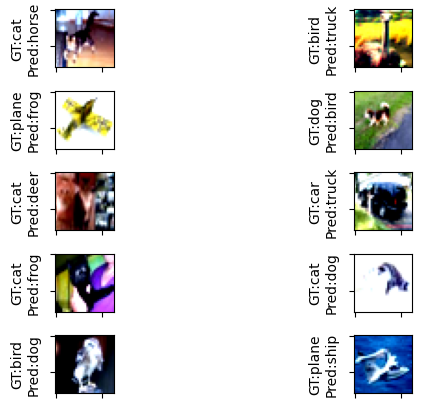

In [8]:
image_tensor, pred, targ = show_images(net, testloader, device, classes, 0)

<Figure size 640x480 with 0 Axes>

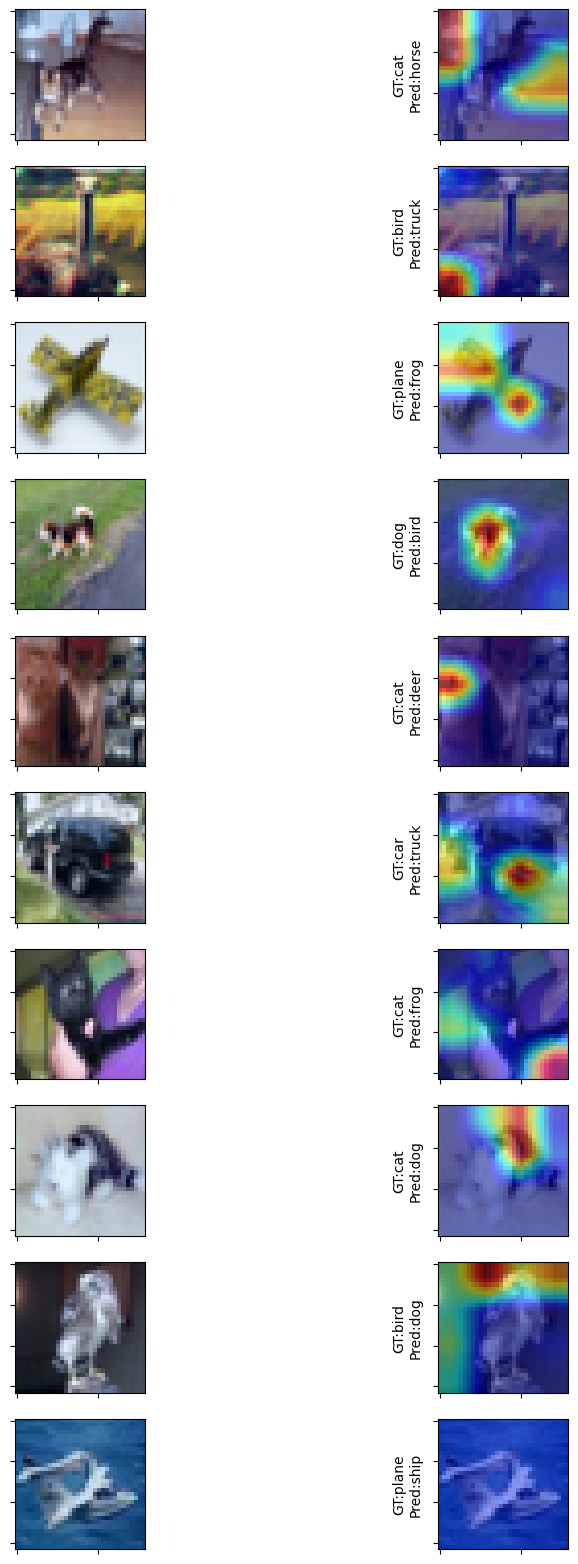

In [9]:
visualize_gradcam(net, image_tensor, targ, pred, classes, -2, 0.5)

<Figure size 640x480 with 0 Axes>

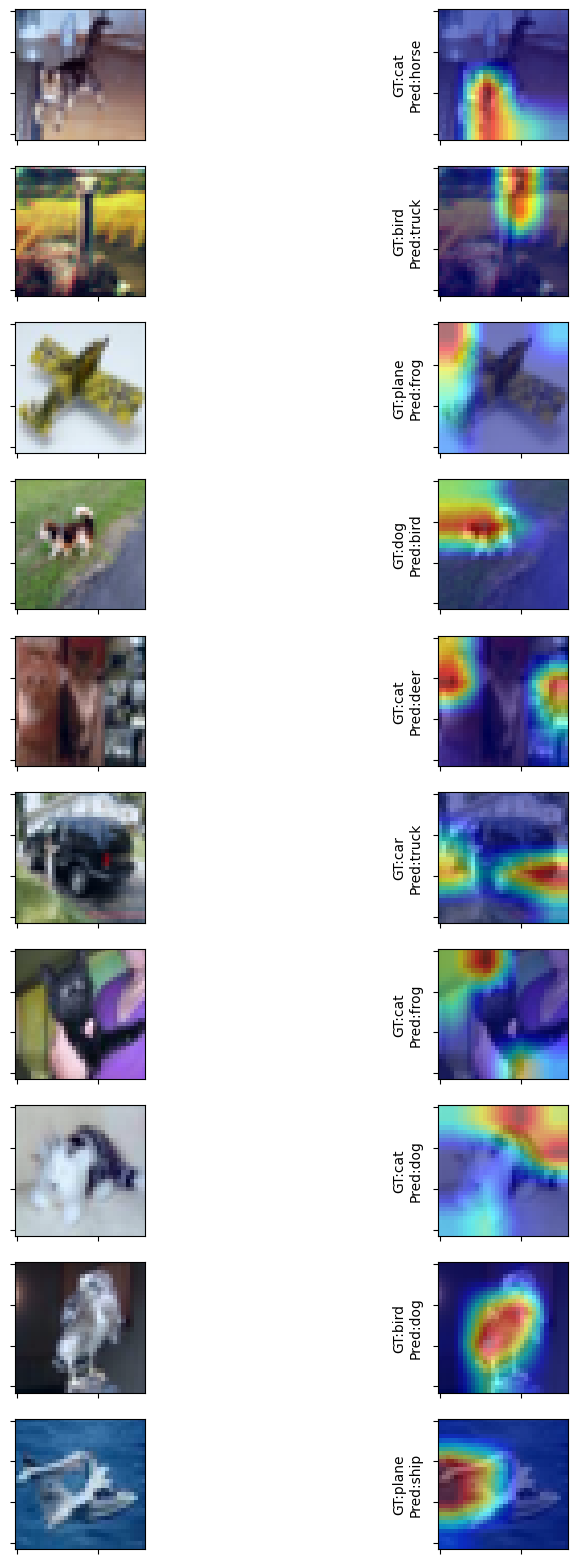

In [10]:
visualize_gradcam(net, image_tensor, targ, pred, classes, -1, 0.5)

#Code for Gradcam on single image for gradio

In [ ]:
!pip install gradio

In [14]:
import gradio as gr
import torch
from PIL import Image
from Dataset.testalbumentation import TestAlbumentation
from Model.Lit_cifar_module import LitCifar
from utils import *

net = LitCifar().cpu()
net.load_state_dict(torch.load('final_dict.pth', map_location=torch.device('cpu')))
net.eval()

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
global_classes = 5

def inference(input_image, transparency, target_layer, num_top_classes1, gradcam_image_display = False):
 im = input_image
 #image_path = input_image.get_path()
 #im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
 #im = Image.open(input_image)
 im = input_image #Image.open('dog.jpg')
 test_transform = TestAlbumentation()
 im1 = test_transform(im)
 im1 = im1.unsqueeze(0).cpu()
 out0 = net(im1)
 out = out0.detach().numpy()
 confidences = {classes[i] : float(out[0][i]) for i in range(10)}
 val = torch.argmax(out0).detach().numpy().tolist()
 targ = [val]
 input_image_np,visualization=gradcame(net, 0, targ, im1, target_layer, transparency)
 return confidences, visualization

interface = gr.Interface(inference,
                         inputs = [gr.Image(shape=(32,32), type="pil", label = "Input image"),
                         gr.Slider(0,1, value = 0.5, label="opacity"),
                         gr.Slider(-2,-1, value = -2, step = 1, label="gradcam layer"),
                         gr.Slider(0,9, value = 0, step = 1, label="no. of top classes to display"),
                         gr.Checkbox(default=False, label="Show Gradcam Image")],
                         outputs = [gr.Label(num_top_classes=global_classes),
                         gr.Image(shape=(32,32), label = "Output")],
                         title = "Gradcam output of network trained on cifar10",
                         examples = [["cat.jpg", 0.5, -1], ["dog.jpg",0.5,-1]],
                         )


# Launch the Gradio interface
interface.launch(share=True)






<ipython-input-14-fbf7fd94d0af>:38: GradioUnusedKwargWarning: You have unused kwarg parameters in Checkbox, please remove them: {'default': False}
  gr.Checkbox(default=False, label="Show Gradcam Image")],


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c6a012618b87a02fef.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [12]:
from PIL import Image
from Dataset.testalbumentation import TestAlbumentation
from Model.Lit_cifar_module import LitCifar
from utils import *
import cv2

net = LitCifar().cpu()
net.load_state_dict(torch.load('final_dict.pth', map_location=torch.device('cpu')))
net.eval()

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

im = Image.open('dog.jpg')
#im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

test_transform = TestAlbumentation()
im1 = test_transform(im)
im1 = im1.unsqueeze(0).cpu()
out0 = net(im1)
out = out0.detach().numpy()
confidences = {classes[i] : float(out[0][i]) for i in range(10)}
val = torch.argmax(out0).detach().numpy().tolist()
targ = [val]
input_image_np,visualization=gradcame(net, 0, targ, im1, -1, 0.5)

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


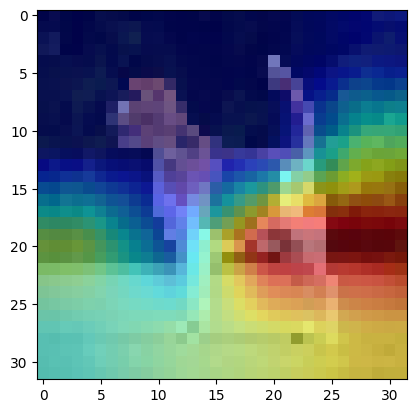

In [13]:
plt.imshow(visualization)

In [39]:
confidences

{'plane': 3.2052643637268128e-15,
 'car': 1.3568688544702417e-14,
 'bird': 3.193621864738816e-07,
 'cat': 0.9999996423721313,
 'deer': 2.8718194489130155e-09,
 'dog': 5.698954641530918e-09,
 'frog': 2.576926583230943e-08,
 'horse': 3.504116441455096e-11,
 'ship': 1.654855072419359e-11,
 'truck': 5.352272986793027e-13}